* train.csv - 승객의 약 3분의 2(~8700)에 대한 개인 기록으로, 교육 데이터로 사용됩니다.
* PassengerId - 각 승객의 고유 ID입니다. 각 ID는 gggg_pp 형식을 취합니다. 여기서 gggg는 승객이 함께 여행하는 그룹을 나타내고 pp는 그룹 내에서 승객의 번호입니다. 한 그룹의 사람들은 종종 가족 구성원이지만 항상은 아닙니다.
* 홈 플래닛 - 승객이 출발한 행성, 일반적으로 영구 거주하는 행성.
* CryoSleep - 승객이 항해 중에 일시 중단된 애니메이션으로 전환되도록 선택했는지 여부를 나타냅니다. 냉동 수면 중인 승객들은 객실에 제한되어 있습니다.
* 객실 - 승객이 머물고 있는 객실 번호입니다. deck/num/side 형식을 취합니다. 여기서 side는 좌현의 경우 P 또는 우현의 경우 S입니다.
* 목적지 - 승객이 출발할 행성.
* 연령 - 탑승자의 연령입니다.
* VIP - 승객이 항해 중에 특별 VIP 서비스에 대한 비용을 지불했는지 여부.
* 룸 서비스, 푸드 코트, 쇼핑몰, 스파, VR덱 - 승객이 우주선 타이타닉의 다양한 고급 편의 시설에 청구한 금액.
* 이름 - 승객의 이름과 성입니다.
* Transported - 승객이 다른 차원으로 운송되었는지 여부를 나타냅니다. 이것이 예측하려는 대상 열입니다.
---
* test.csv - 나머지 승객의 3분의 1(~4300명)에 대한 개인 기록을 테스트 데이터로 사용합니다. 당신의 임무는 이 세트의 승객들을 위한 운송의 가치를 예측하는 것입니다.
* sample_submission.csv - 올바른 형식의 제출 파일입니다.
* PassengerId - 테스트 세트의 각 승객에 대한 ID.



어떤 안좋은 시고로 인해서 일부 승객이 다른 차원으로 transported 되버림. 이런 불쌍한 승객들을 찾아서 구조하자.

그럼 gggg 가 같으면 같은 그룹이라는 거고. 그룹 라벨을 하나 만들면 좋겠고
홈플래닛 -> 인코딩
룸서비스는 


# (추가적으로 고려할것) 참고 전략


전체적으로 이상치가 많은 데이터이므로(몇몇 매우 큰값들이 존재), 이를 방지할수 있는 log 스케일링이라던가, 이상치에 덜 민감한 랜덤포레스트 같은 전략을 취할 필요가 있다.

EDA

1.target 기준으로 나눠서 violin plot, 누적 bar 그래프 참고

scaling

We're going to see what transformation works better for each feature and select them, the idea is to compress the data. There could be situations where you will have to stretch the data. These are the methods applied:

**Log Transformation**: This transformation involves taking the logarithm of each data point. It is useful when the data is highly skewed and the variance increases with the mean.

                                  y = log(x)
**Square Root Transformation**: This transformation involves taking the square root of each data point. It is useful when the data is highly skewed and the variance increases with the mean.

                                  y = sqrt(x)
**Box-Cox Transformation**: This transformation is a family of power transformations that includes the log and square root transformations as special cases. It is useful when the data is highly skewed and the variance increases with the mean.

                                  y = [(x^lambda) - 1] / lambda if lambda != 0
                                  y = log(x) if lambda = 0
**Yeo-Johnson Transformation**: This transformation is similar to the Box-Cox transformation, but it can be applied to both positive and negative values. It is useful when the data is highly skewed and the variance increases with the mean.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
pd.set_option('display.max_row', 500)

In [4]:
df_original = pd.read_csv("C:\\Users\\김승호\\spaceship-titanic\\train.csv")
df = df_original.copy()
df


df2 = pd.read_csv("C:\\Users\\김승호\\spaceship-titanic\\test.csv")

In [5]:
df_original

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
for col in df.columns :
    print(col,"\n", df[col].unique())
    print('유니크한 카테고리 수 : ',len(df[col].unique()))
    print('null 수              : ', df[col].isna().sum(),"\n")

PassengerId 
 ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
유니크한 카테고리 수 :  8693
null 수              :  0 

HomePlanet 
 ['Europa' 'Earth' 'Mars' nan]
유니크한 카테고리 수 :  4
null 수              :  201 

CryoSleep 
 [False True nan]
유니크한 카테고리 수 :  3
null 수              :  217 

Cabin 
 ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
유니크한 카테고리 수 :  6561
null 수              :  199 

Destination 
 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
유니크한 카테고리 수 :  4
null 수              :  182 

Age 
 [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
유니크한 카테고리 수 :  81
null 수              :  179 

VIP 
 [False True nan]
유니크한 카테고리 수 :  3
null 수              :  203 

RoomService 
 [   0.  109.  

In [8]:
df['group'] = [int(s[:4]) for s in df.PassengerId]
df2['group'] = [int(s[:4]) for s in df2.PassengerId]

In [9]:
import random

random_ = random.sample(list(df['group'].unique()),100)

for group_ in random_ : 
    print(df[(df['group'] == group_ )])
    print("===================================",'\n')

    PassengerId HomePlanet CryoSleep    Cabin  Destination   Age    VIP  \
656     0686_01       Mars      True  F/146/P  TRAPPIST-1e  18.0  False   
657     0686_02       Mars     False   D/30/P  TRAPPIST-1e  29.0   True   

     RoomService  FoodCourt  ShoppingMall   Spa  VRDeck         Name  \
656          0.0        0.0           0.0   0.0     0.0  Permit Bert   
657       3887.0        0.0           NaN  12.0     0.0   Cheat Bert   

     Transported  group  
656         True    686  
657        False    686  

    PassengerId HomePlanet CryoSleep   Cabin  Destination   Age    VIP  \
350     0384_01      Earth     False  G/56/S  55 Cancri e   0.0  False   
351     0384_02      Earth     False  G/56/S  TRAPPIST-1e  14.0  False   

     RoomService  FoodCourt  ShoppingMall   Spa  VRDeck              Name  \
350          0.0        0.0           0.0   0.0     0.0  Cliney Simpsonks   
351          3.0        0.0         881.0  25.0     0.0  Ellard Simpsonks   

     Transported  group

474         True    510  

     PassengerId HomePlanet CryoSleep    Cabin  Destination   Age    VIP  \
4109     4388_01     Europa     False  B/171/S  TRAPPIST-1e  33.0  False   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck Name  Transported  \
4109          0.0        0.0           0.0  0.0     0.0  NaN         True   

      group  
4109   4388  

     PassengerId HomePlanet CryoSleep    Cabin  Destination   Age    VIP  \
4326     4609_01     Europa     False  C/173/S  TRAPPIST-1e  37.0  False   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck              Name  \
4326          1.0      477.0           0.0  0.0  7087.0  Algork Amblereld   

      Transported  group  
4326        False   4609  

    PassengerId HomePlanet CryoSleep   Cabin  Destination   Age    VIP  \
680     0710_01       Mars     False  E/42/P  TRAPPIST-1e  23.0  False   

     RoomService  FoodCourt  ShoppingMall   Spa  VRDeck        Name  \
680       1695.0        0.0           0.0  31.0   349

In [10]:
def is_str(x):
    return isinstance(x, str)

df['last_name'] = [name_.split(' ')[1] if is_str(name_) else name_ for name_ in df['Name']]

df2['last_name'] = [name_.split(' ')[1] if is_str(name_) else name_ for name_ in df2['Name']]

In [11]:
# df[(df['VIP'] == True )].to_csv("C:\\Users\\김승호\\Desktop\\데브코스 ai\\vip인사람 특징.csv")

In [12]:
# # 그룹이 같으면 vip도 같아?

# for i in df['group'].unique() :
#     test2 = df[(df['group'] == i)]
#     vip = sum([1 if v  else 0 for v in test2['VIP']])
#     if vip :
#         print(test2.shape[0])
#         print(vip)
#         print("====")

# ## 결론 : 그룹당 한명씩 vip긴 한데 이게 상관관계가 있다고는 못하겠다.

In [13]:
# group이 동일한 승객끼리는 
# 일단 last name이 거의 동일하고
# 출발지는 거의 똑같음
# 도착지 다른경우도 있는데 대부분 똑같은듯, 
# vip랑은 관련없어보임
# cabin 도 비슷함

In [14]:
# # for group in df['group'].unique() :

# group_sim = ['HomePlanet','Cabin','Destination','last_name']

# for i in df['group'].unique():
#     test1 = df[(df['group'] == i )]
#     for col in group_sim :
#         if len(test1) >= 1 and test1[col].isnull().sum() >= 1 :
#             print(test1)
#             print("============")
            
#         else :
#             continue


In [15]:
group_sim = ['HomePlanet','Cabin','Destination','last_name']

for col in group_sim:
    if col in df.columns:
        df[col] = df.groupby('group')[col].transform(lambda x: x.fillna(method='ffill'))
        # 같은 그룹이면 모두 윗열 참고해서 채워버리고
    df[col] = df[col].transform(lambda x: x.fillna(method='bfill'))
    # 그룹이 1개짜리, 또는 가장 윗열이 nan인경우 그냥 아래열 참고해서 채워넣자.

In [16]:
group_sim = ['HomePlanet','Cabin','Destination','last_name']

for col in group_sim:
    if col in df2.columns:
        df2[col] = df2.groupby('group')[col].transform(lambda x: x.fillna(method='ffill'))
        # 같은 그룹이면 모두 윗열 참고해서 채워버리고
    df2[col] = df2[col].transform(lambda x: x.fillna(method='bfill'))
    # 그룹이 1개짜리, 또는 가장 윗열이 nan인경우 그냥 아래열 참고해서 채워넣자.

In [17]:
cost_col = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for col in cost_col :
    df[col] = df[col].fillna(0)
    df2[col] = df2[col].fillna(0)

In [18]:
df['spend_fillna_0'] = df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis = 1)
df2['spend_fillna_0'] = df2[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis = 1)

In [19]:
df['VIP_fill_na_False'] = df['VIP'].fillna(False)
df2['VIP_fill_na_False'] = df2['VIP'].fillna(False)

In [20]:
for ind, a in enumerate(df['CryoSleep']) :
    if np.isnan(a) :
        if df['spend_fillna_0'][ind] == 0:
            df.loc[ind, 'CryoSleep'] = True
        else :
            df.loc[ind, 'CryoSleep'] = False

In [21]:
for ind, a in enumerate(df2['CryoSleep']) :
    if np.isnan(a) :
        if df2['spend_fillna_0'][ind] == 0:
            df2.loc[ind, 'CryoSleep'] = True
        else :
            df2.loc[ind, 'CryoSleep'] = False

In [22]:
df.isnull().sum()

PassengerId            0
HomePlanet             0
CryoSleep              0
Cabin                  0
Destination            0
Age                  179
VIP                  203
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
Name                 200
Transported            0
group                  0
last_name              0
spend_fillna_0         0
VIP_fill_na_False      0
dtype: int64

In [23]:
deck = []
num = []
side = []

for i in df.Cabin :
    if str(i).find('/') >= 0 :
        try :
            d,n,s = str(i).split('/')
            deck.append(d)
            num.append(int(n))
            side.append(s)
        except :
            print(i)
            break
    else : 
        print(i)
        deck.append(np.nan)
        num.append(np.nan)
        side.append(np.nan)

df['deck'] = deck
df['num'] = num
df['side'] = side

In [24]:
deck = []
num = []
side = []


for i in df2.Cabin :
    if str(i).find('/') >= 0 :
        try :
            d,n,s = str(i).split('/')
            deck.append(d)
            num.append(int(n))
            side.append(s)
        except :
            print(i)
            break
    else : 
        print(i)
        deck.append(np.nan)
        num.append(np.nan)
        side.append(np.nan)

df2['deck'] = deck
df2['num'] = num
df2['side'] = side

In [37]:
# 최종적으로 버릴 변수 PassengerId, VIP, Name, Cabin

col_drop = ['PassengerId', 'VIP', 'Name', 'Cabin']

df = df[[col for col in df.columns if col not in col_drop]]
df2 = df2[[col for col in df2.columns if col not in col_drop]]

df['Age'].fillna(df['Age'].median(), inplace=True)
df2['Age'].fillna(df['Age'].median(), inplace=True)


In [38]:
print(df[df['Age'].isnull()])

Empty DataFrame
Columns: [HomePlanet, CryoSleep, Destination, Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Transported, group, last_name, spend_fillna_0, VIP_fill_na_False, deck, num, side]
Index: []


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HomePlanet         8693 non-null   object 
 1   CryoSleep          8693 non-null   object 
 2   Destination        8693 non-null   object 
 3   Age                8693 non-null   float64
 4   RoomService        8693 non-null   float64
 5   FoodCourt          8693 non-null   float64
 6   ShoppingMall       8693 non-null   float64
 7   Spa                8693 non-null   float64
 8   VRDeck             8693 non-null   float64
 9   Transported        8693 non-null   bool   
 10  group              8693 non-null   int64  
 11  last_name          8693 non-null   object 
 12  spend_fillna_0     8693 non-null   float64
 13  VIP_fill_na_False  8693 non-null   bool   
 14  deck               8693 non-null   object 
 15  num                8693 non-null   int64  
 16  side               8693 

In [40]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'group',
       'last_name', 'spend_fillna_0', 'VIP_fill_na_False', 'deck', 'num',
       'side'],
      dtype='object')

In [41]:
df2.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'group', 'last_name',
       'spend_fillna_0', 'VIP_fill_na_False', 'deck', 'num', 'side'],
      dtype='object')

In [42]:
# y = df['Transported']
# df = df.drop('Transported', axis=1)

In [43]:
for col in df.columns :
    print(col,"\n", df[col].unique())
    print('유니크한 카테고리 수 : ',len(df[col].unique()))
    print('null 수              : ', df[col].isna().sum(),"\n")

HomePlanet 
 ['Europa' 'Earth' 'Mars']
유니크한 카테고리 수 :  3
null 수              :  0 

CryoSleep 
 [False True]
유니크한 카테고리 수 :  2
null 수              :  0 

Destination 
 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
유니크한 카테고리 수 :  3
null 수              :  0 

Age 
 [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61. 50.
 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71. 75.
 70. 76. 78. 73. 66. 69. 72. 77.]
유니크한 카테고리 수 :  80
null 수              :  0 

RoomService 
 [   0.  109.   43. ... 1569. 8586.  745.]
유니크한 카테고리 수 :  1273
null 수              :  0 

FoodCourt 
 [   0.    9. 3576. ... 3208. 6819. 4688.]
유니크한 카테고리 수 :  1507
null 수              :  0 

ShoppingMall 
 [   0.   25.  371. ... 1085.  510. 1872.]
유니크한 카테고리 수 :  1115
null 수              :  0 

Spa 
 [   0.  549. 6715. ... 2868. 1107. 1643.]
유니크한 카테고리 수

In [44]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'group',
       'last_name', 'spend_fillna_0', 'VIP_fill_na_False', 'deck', 'num',
       'side'],
      dtype='object')

In [45]:
for col in df2.columns :
    print(col,"\n", df2[col].unique())
    print('유니크한 카테고리 수 : ',len(df2[col].unique()))
    print('null 수              : ', df2[col].isna().sum(),"\n")

HomePlanet 
 ['Earth' 'Europa' 'Mars']
유니크한 카테고리 수 :  3
null 수              :  0 

CryoSleep 
 [True False]
유니크한 카테고리 수 :  2
null 수              :  0 

Destination 
 ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22']
유니크한 카테고리 수 :  3
null 수              :  0 

Age 
 [27. 19. 31. 38. 20. 21. 23. 24. 45. 44. 46. 29. 40. 30. 14. 66. 36. 18.
 26. 48.  6. 33.  1. 17. 34.  5. 22. 16.  7.  2.  0. 56. 39. 35.  8.  3.
  9. 25. 42. 50. 41. 32. 49. 55. 60. 47. 58. 28. 12. 52. 15. 43. 54. 70.
 37. 59. 61. 63. 53.  4. 10. 65. 13. 51. 79. 74. 67. 69. 57. 72. 75. 11.
 73. 71. 64. 62. 78. 77. 68.]
유니크한 카테고리 수 :  79
null 수              :  0 

RoomService 
 [0.0000e+00 1.0000e+01 3.3900e+02 9.3200e+02 2.0000e+00 2.6000e+01
 3.9000e+01 1.7840e+03 2.9300e+02 5.9800e+02 1.4000e+01 4.8300e+02
 6.6000e+01 1.0000e+00 1.0370e+03 3.9660e+03 4.6000e+01 4.1300e+02
 3.7800e+02 3.2000e+01 8.3200e+02 3.6200e+02 7.5600e+02 1.9700e+02
 6.0000e+00 2.6100e+02 1.6690e+03 4.4000e+01 3.3000e+01 7.1700e+02
 4.7620e+03 7.4100e+02

In [46]:
df2

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,last_name,spend_fillna_0,VIP_fill_na_False,deck,num,side
0,Earth,True,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,13,Carsoning,0.0,False,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,0.0,9.0,0.0,2823.0,0.0,18,Peckers,2832.0,False,F,4,S
2,Europa,True,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,19,Unhearfus,0.0,False,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,0.0,6652.0,0.0,181.0,585.0,21,Caltilter,7418.0,False,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,10.0,0.0,635.0,0.0,0.0,23,Harperez,645.0,False,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,0.0,9266,Peter,0.0,False,G,1496,S
4273,Earth,False,TRAPPIST-1e,42.0,0.0,847.0,17.0,10.0,144.0,9269,Scheron,1018.0,False,D,296,P
4274,Mars,True,55 Cancri e,27.0,0.0,0.0,0.0,0.0,0.0,9271,Pore,0.0,False,D,296,P
4275,Europa,False,PSO J318.5-22,27.0,0.0,2680.0,0.0,0.0,523.0,9273,Conale,3203.0,False,D,297,P


In [47]:
from sklearn.preprocessing import LabelEncoder

encoder_col = ['HomePlanet', 'CryoSleep', 'Destination','last_name','VIP_fill_na_False', 'deck','side']
encoder = LabelEncoder()

# LabelEncoder를 객체로 생성
encoder_HomePlanet = LabelEncoder()
# fit, transform 메소드를 통한 레이블 인코딩
df['HomePlanet'] = encoder_HomePlanet.fit_transform(df['HomePlanet'])
df2['HomePlanet'] = encoder_HomePlanet.transform(df2['HomePlanet'])

# LabelEncoder를 객체로 생성
encoder_CryoSleep = LabelEncoder()
# fit, transform 메소드를 통한 레이블 인코딩
df['CryoSleep'] = encoder_CryoSleep.fit_transform(df['CryoSleep'])
df2['CryoSleep'] = encoder_CryoSleep.transform(df2['CryoSleep'])

# LabelEncoder를 객체로 생성
encoder_Destination = LabelEncoder()
# fit, transform 메소드를 통한 레이블 인코딩
df['Destination'] = encoder_Destination.fit_transform(df['Destination'])
df2['Destination'] = encoder_Destination.transform(df2['Destination'])

# LabelEncoder를 객체로 생성
encoder_last_name = LabelEncoder()
# fit, transform 메소드를 통한 레이블 인코딩
df['last_name'] = encoder_last_name.fit_transform(df['last_name'])
df2['last_name'] = df2['last_name'].apply(lambda x: encoder_last_name.transform([x])[0] if x in encoder_last_name.classes_ else 0)

# LabelEncoder를 객체로 생성
encoder_deck = LabelEncoder()
# fit, transform 메소드를 통한 레이블 인코딩
df['deck'] = encoder_deck.fit_transform(df['deck'])
df2['deck'] = encoder_deck.transform(df2['deck'])

encoder_side = LabelEncoder()
# fit, transform 메소드를 통한 레이블 인코딩
df['side'] = encoder_side.fit_transform(df['side'])
df2['side'] = encoder_side.transform(df2['side'])


df['VIP_fill_na_False'] = df['VIP_fill_na_False'].astype(int)
df2['VIP_fill_na_False'] = df2['VIP_fill_na_False'].astype(int)


In [48]:
df.corr()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,last_name,spend_fillna_0,VIP_fill_na_False,deck,num,side
HomePlanet,1.000000,0.088953,0.039393,0.132723,0.212442,0.068821,0.101507,0.053451,0.040193,0.116881,-0.004601,0.004435,0.148622,0.124166,-0.410312,-0.198557,0.001229
CryoSleep,0.088953,1.000000,-0.094802,-0.077806,-0.250173,-0.211061,-0.212977,-0.203249,-0.197524,0.467230,-0.004304,0.014009,-0.386081,-0.081318,0.016910,-0.036606,0.018982
Destination,0.039393,-0.094802,1.000000,-0.005473,0.046382,-0.110375,0.025525,-0.056524,-0.072374,-0.110135,-0.003366,-0.015588,-0.098442,-0.044469,0.187318,0.102247,-0.011132
Age,0.132723,-0.077806,-0.005473,1.000000,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233,-0.009099,0.005079,0.184628,0.091863,-0.244236,-0.132380,0.010871
RoomService,0.212442,-0.250173,0.046382,0.068629,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,0.000375,-0.016133,0.234374,0.056566,-0.030345,-0.013001,-0.009727
FoodCourt,0.068821,-0.211061,-0.110375,0.127390,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,-0.009200,0.012275,0.742608,0.125499,-0.317544,-0.179688,0.016528
ShoppingMall,0.101507,-0.212977,0.025525,0.033148,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,0.017796,0.001924,0.220529,0.018412,-0.030913,0.002405,-0.018390
Spa,0.053451,-0.203249,-0.056524,0.120946,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,-0.005198,0.001100,0.592656,0.060991,-0.222740,-0.129796,0.002587
VRDeck,0.040193,-0.197524,-0.072374,0.099590,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,0.015945,0.007743,0.585684,0.123061,-0.251901,-0.134377,-0.009258
Transported,0.116881,0.467230,-0.110135,-0.074233,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000,0.021491,0.015370,-0.199514,-0.037261,-0.117590,-0.046512,0.103359


In [49]:
df2

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,last_name,spend_fillna_0,VIP_fill_na_False,deck,num,side
0,0,1,2,27.0,0.0,0.0,0.0,0.0,0.0,13,344,0.0,0,6,3,1
1,0,0,2,19.0,0.0,9.0,0.0,2823.0,0.0,18,1505,2832.0,0,5,4,1
2,1,1,0,31.0,0.0,0.0,0.0,0.0,0.0,19,2070,0.0,0,2,0,1
3,1,0,2,38.0,0.0,6652.0,0.0,181.0,585.0,21,324,7418.0,0,2,1,1
4,0,0,2,20.0,10.0,0.0,635.0,0.0,0.0,23,926,645.0,0,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.0,0.0,0.0,0.0,0.0,0.0,9266,1531,0.0,0,6,1496,1
4273,0,0,2,42.0,0.0,847.0,17.0,10.0,144.0,9269,1791,1018.0,0,3,296,0
4274,2,1,0,27.0,0.0,0.0,0.0,0.0,0.0,9271,0,0.0,0,3,296,0
4275,1,0,1,27.0,0.0,2680.0,0.0,0.0,523.0,9273,457,3203.0,0,3,297,0


In [74]:
# col = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
#        'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'group', 'last_name',
#        'spend_fillna_0', 'VIP_fill_na_False', 'deck', 'num', 'side']


y = df['Transported']
df = df.drop('Transported', axis=1)


KeyError: 'Transported'

In [75]:
# col = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
#        'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'group', 'last_name',
#        'spend_fillna_0', 'VIP_fill_na_False', 'deck', 'num', 'side']

col = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'FoodCourt',  'Spa', 'VRDeck', 'group', 'last_name',
       'spend_fillna_0', 'VIP_fill_na_False', 'deck', 'num', 'side']

df_ = df.loc[:,col]
df2_ = df2.loc[:,col]

X_train = np.array(df_)
y_train = np.array(y)

X_test = np.array(df2_)

In [76]:
df_

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,Spa,VRDeck,group,last_name,spend_fillna_0,VIP_fill_na_False,deck,num,side
0,1,0,2,39.0,0.0,0.0,0.0,0.0,1,1431,0.0,0,1,0,0
1,0,0,2,24.0,109.0,9.0,549.0,44.0,2,2109,736.0,0,5,0,1
2,1,0,2,58.0,43.0,3576.0,6715.0,49.0,3,1990,10383.0,1,0,0,1
3,1,0,2,33.0,0.0,1283.0,3329.0,193.0,3,1990,5176.0,0,0,0,1
4,0,0,2,16.0,303.0,70.0,565.0,2.0,4,1778,1091.0,0,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,0.0,6819.0,1643.0,74.0,9276,1416,8536.0,1,0,98,0
8689,0,1,1,18.0,0.0,0.0,0.0,0.0,9278,1341,0.0,0,6,1499,1
8690,0,0,2,26.0,0.0,0.0,1.0,0.0,9279,470,1873.0,0,6,1500,1
8691,1,0,0,32.0,0.0,1049.0,353.0,3235.0,9280,996,4637.0,0,4,608,1


In [77]:
X_train.shape
 
X_test.shape

(4277, 15)

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=12) # 주성분을 몇개로 할지 결정
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)
# print(np.cumsum(pca.explained_variance_ratio_)[-1])

In [65]:
# from sklearn.model_selection import train_test_split

# X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size=0.8,random_state=32, shuffle=True, stratify=y)

In [67]:
X_train.shape

(6954, 15)

In [68]:
## 왜 AGE를 빼야 학습이 진행되는가?

In [69]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

model = tf.keras.Sequential()
model.add(layers.Dense(12, input_shape=(X_train.shape[1],), 
                       activation='relu', 
                       kernel_regularizer=tf.keras.regularizers.l1(0.001),
                       kernel_initializer='he_normal'
                      ))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(30, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001),
                       kernel_initializer='he_normal'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))


model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 6, mode = 'auto')


history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    callbacks = [early_stopping]
                   )



Epoch 1/100
435/435 [==============================] - 2s 2ms/step - loss: 0.8260 - binary_accuracy: 0.6483 - val_loss: 0.6596 - val_binary_accuracy: 0.7683
Epoch 2/100
435/435 [==============================] - 1s 2ms/step - loss: 0.7149 - binary_accuracy: 0.7183 - val_loss: 0.6231 - val_binary_accuracy: 0.7752
Epoch 3/100
435/435 [==============================] - 1s 2ms/step - loss: 0.6810 - binary_accuracy: 0.7366 - val_loss: 0.6017 - val_binary_accuracy: 0.7832
Epoch 4/100
435/435 [==============================] - 1s 2ms/step - loss: 0.6462 - binary_accuracy: 0.7453 - val_loss: 0.5816 - val_binary_accuracy: 0.7826
Epoch 5/100
435/435 [==============================] - 1s 2ms/step - loss: 0.6255 - binary_accuracy: 0.7606 - val_loss: 0.5587 - val_binary_accuracy: 0.7895
Epoch 6/100
435/435 [==============================] - 1s 2ms/step - loss: 0.6102 - binary_accuracy: 0.7627 - val_loss: 0.5477 - val_binary_accuracy: 0.7890
Epoch 7/100
435/435 [==============================] - 1s 

In [ ]:
#?? 근데 왜 난 여지껏 트레인 비율을 0.2로 한거임?

# layer 3층 64,64,1, 배치사이즈 16, 각 레이어에 l1규제 (0.001), 레이어 사이 배치정규화, dropout(0.3) 적용. -> val 성능 79%
# layer 4층 8,64,64,1, 배치사이즈 16, 각 레이어에 l1규제 (0.001), 레이어 사이 배치정규화, dropout(0.2) 적용. -> val 성능 79.47%
# 쓸데없는 변수는 버려야 하나?
# 변수간의 상관성이 아마 매우 클텐데
# layer 4층 8,12,12,1, 배치사이즈 16, 각 레이어에 l2규제 (0.001), 레이어 사이 배치정규화, dropout(0.2) 적용. -> val 성능 79.30% 오히려 train loss 매우 흔들림
# layer 4층 4,96,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.001), 레이어 사이 배치정규화, dropout(0.2) 적용. -> val 성능 77.70% train loss, val loss 매우 흔들림
# layer 4층 4,64,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.001), 배치정규화 삭제, dropout(0.2) 적용. -> val 성능 78.84%
# layer 4층 4,64,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.001), 배치정규화 삭제, 헤 가중치 초기화, dropout(0.2) 적용. -> val 성능 79.17% 초반 학습이 안정적
# layer 4층 8,64,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.01), 레이어 사이 배치정규화, dropout(0.2) 적용 , 헤 가중치 초기화, dropout(0.2) 적용. -> val 성능 79.12% 
# layer 4층 16,64,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.01), 레이어 사이 배치정규화, dropout(0.2) 적용 , 헤 가중치 초기화, dropout(0.2) 적용. -> val 성능 79.25% 

# 확실히 input shape를 늘려야 성능이 올라가네. 근데 왜냐 이게.. 차원 축소하면 상관관계 사라지지 않나?

# pca적용 -> 8개 차원, 75%  분산 설명
# layer 4층 16,64,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.01), 레이어 사이 배치정규화, dropout(0.2) 적용 , 헤 가중치 초기화, dropout(0.2) 적용. -> val 성능 74.32% 

# pca적용 -> 12개 차원, 95%  분산 설명
# layer 4층 16,64,64,1, 배치사이즈 16, 각 레이어에 l2규제 (0.01), 레이어 사이 배치정규화, dropout(0.2) 적용 , 헤 가중치 초기화, dropout(0.2) 적용. -> val 성능 77.61% 반복시에 성능 상승(79.31)이 보이긴 했으나, 최종적으론 79-77 사이를 오감


# 1D cnn 적용 -> 커널 5, 채널 32,32,1, dropout(0.2) -> 78.02 -> 이게 근데 사실 되는게 이상하긴해 ㅋㅋ, val loss 많이 벌어짐



In [81]:
## 실험 최고 모델

import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

model = tf.keras.Sequential()
model.add(layers.Dense(30, input_shape=(X_train.shape[1],), 
                       activation='relu', 
                       kernel_regularizer=tf.keras.regularizers.l1(0.001),
                       kernel_initializer='he_normal'
                      ))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(30, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.001),
                       kernel_initializer='he_normal'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))


model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 6, mode = 'auto')


history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=16,
#                     validation_data=(X_val, y_val),
                    callbacks = [early_stopping]
                   )



Epoch 1/50
544/544 [==============================] - 1s 1ms/step - loss: 0.8991 - binary_accuracy: 0.6799
Epoch 2/50
544/544 [==============================] - 1s 1ms/step - loss: 0.7917 - binary_accuracy: 0.7400
Epoch 3/50
544/544 [==============================] - 1s 1ms/step - loss: 0.7358 - binary_accuracy: 0.7473
Epoch 4/50
544/544 [==============================] - 1s 1ms/step - loss: 0.6918 - binary_accuracy: 0.7592
Epoch 5/50
544/544 [==============================] - 1s 1ms/step - loss: 0.6450 - binary_accuracy: 0.7707
Epoch 6/50
544/544 [==============================] - 1s 1ms/step - loss: 0.6175 - binary_accuracy: 0.7771
Epoch 7/50
544/544 [==============================] - 1s 1ms/step - loss: 0.5852 - binary_accuracy: 0.7826
Epoch 8/50
544/544 [==============================] - 1s 1ms/step - loss: 0.5750 - binary_accuracy: 0.7810
Epoch 9/50
544/544 [==============================] - 1s 1ms/step - loss: 0.5530 - binary_accuracy: 0.7792
Epoch 10/50
544/544 [================

544/544 [==============================] - 1s 1ms/step - loss: 0.4774 - binary_accuracy: 0.7895
Epoch 26/50
544/544 [==============================] - 1s 1ms/step - loss: 0.4744 - binary_accuracy: 0.7929
Epoch 27/50
544/544 [==============================] - 1s 1ms/step - loss: 0.4769 - binary_accuracy: 0.7881
Epoch 28/50
544/544 [==============================] - 1s 1ms/step - loss: 0.4742 - binary_accuracy: 0.7958
Epoch 29/50
544/544 [==============================] - 1s 1ms/step - loss: 0.4817 - binary_accuracy: 0.7850
Epoch 30/50
544/544 [==============================] - 1s 1ms/step - loss: 0.4758 - binary_accuracy: 0.7933
Epoch 31/50
544/544 [==============================] - 1s 1ms/step - loss: 0.4796 - binary_accuracy: 0.7880
Epoch 32/50
544/544 [==============================] - 1s 1ms/step - loss: 0.4765 - binary_accuracy: 0.7924
Epoch 33/50
544/544 [==============================] - 1s 1ms/step - loss: 0.4703 - binary_accuracy: 0.7980
Epoch 34/50
544/544 [===================

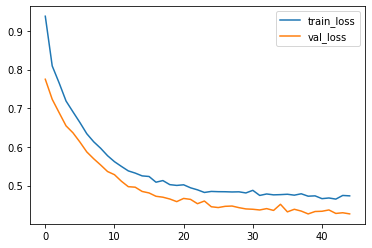

In [80]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [82]:
# X_test 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# 예측 결과 출력
y_pred

134/134 [==============================] - 0s 970us/step


array([[0.54320294],
       [0.10087153],
       [0.977016  ],
       ...,
       [0.7777112 ],
       [0.6305897 ],
       [0.57586414]], dtype=float32)

In [83]:
submission = pd.read_csv("C:\\Users\\김승호\\spaceship-titanic\\sample_submission.csv")
preds = [p[0] >= 0.5 for p in y_pred]
submission['Transported'] = preds
submission.to_csv("C:\\Users\\김승호\\spaceship-titanic\\Include_Age_submission.csv",index=False)

In [51]:
model = tf.keras.Sequential()
model.add(layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.BatchNormalization())

model.add(layers.Conv1D(32, kernel_size=5, activation='relu', padding='same'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01),
                       kernel_initializer='he_normal'))

model.add(layers.BatchNormalization())

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 8, mode = 'auto')


history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, 
                    epochs=100, 
                    batch_size=16,
                    validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val),
                    callbacks = [early_stopping]
                   )


Epoch 1/100
109/109 [==============================] - 3s 12ms/step - loss: nan - binary_accuracy: 0.5144 - val_loss: nan - val_binary_accuracy: 0.4963
Epoch 2/100
109/109 [==============================] - 1s 12ms/step - loss: nan - binary_accuracy: 0.4965 - val_loss: nan - val_binary_accuracy: 0.4963
Epoch 3/100
109/109 [==============================] - 2s 14ms/step - loss: nan - binary_accuracy: 0.4965 - val_loss: nan - val_binary_accuracy: 0.4963
Epoch 4/100
109/109 [==============================] - 2s 14ms/step - loss: nan - binary_accuracy: 0.4965 - val_loss: nan - val_binary_accuracy: 0.4963
Epoch 5/100
101/109 [==========================>...] - ETA: 0s - loss: nan - binary_accuracy: 0.4938

KeyboardInterrupt: 

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # 정확도 함수


for n in range(10,101,10):
    for j in range(10,51,5):
        clf = RandomForestClassifier(n_estimators=n, max_depth=j,random_state=0)
        clf.fit(X_train,y_train)

        predict1 = clf.predict(X_val)
        print('하이퍼 파라미터 k,d : (',n,j,')')
        print('정확도 : ',accuracy_score(y_val,predict1))
        print('=======================================')

하이퍼 파라미터 k,d : ( 10 10 )
정확도 :  0.7728253055355859
하이퍼 파라미터 k,d : ( 10 15 )
정확도 :  0.7739755571531273
하이퍼 파라미터 k,d : ( 10 20 )
정확도 :  0.7725377426312006
하이퍼 파라미터 k,d : ( 10 25 )
정확도 :  0.77196261682243
하이퍼 파라미터 k,d : ( 10 30 )
정확도 :  0.77196261682243
하이퍼 파라미터 k,d : ( 10 35 )
정확도 :  0.77196261682243
하이퍼 파라미터 k,d : ( 10 40 )
정확도 :  0.77196261682243
하이퍼 파라미터 k,d : ( 10 45 )
정확도 :  0.77196261682243
하이퍼 파라미터 k,d : ( 10 50 )
정확도 :  0.77196261682243
하이퍼 파라미터 k,d : ( 20 10 )
정확도 :  0.7787203450754853
하이퍼 파라미터 k,d : ( 20 15 )
정확도 :  0.7800143781452192
하이퍼 파라미터 k,d : ( 20 20 )
정확도 :  0.784040258806614
하이퍼 파라미터 k,d : ( 20 25 )
정확도 :  0.7768511861969806
하이퍼 파라미터 k,d : ( 20 30 )
정확도 :  0.7768511861969806
하이퍼 파라미터 k,d : ( 20 35 )
정확도 :  0.7768511861969806
하이퍼 파라미터 k,d : ( 20 40 )
정확도 :  0.7768511861969806
하이퍼 파라미터 k,d : ( 20 45 )
정확도 :  0.7768511861969806
하이퍼 파라미터 k,d : ( 20 50 )
정확도 :  0.7768511861969806
하이퍼 파라미터 k,d : ( 30 10 )
정확도 :  0.779726815240834
하이퍼 파라미터 k,d : ( 30 15 )
정확도 :  0.78332135154

XGBoost(Extreme Gradient Boosting)는 GBM(Gradient Boosting Machine) 기반의 앙상블 학습 알고리즘 중 하나로, 다양한 데이터 분류 및 회귀 문제에 대해 높은 성능을 보이고 있습니다.

XGBoost의 주요 특징은 다음과 같습니다.

* Regularization: L1, L2 regularization 및 max depth 등을 통해 overfitting 방지
* Tree Pruning: 불필요한 가지 제거를 통한 효율적인 모델 생성
* Handling Missing Values: 결측치 처리 기능 제공
* Cross-Validation: 교차 검증 기능 제공
* Parallel Processing: 멀티코어 CPU를 이용한 병렬처리

하이퍼파라미터 세팅은 다음과 같은 것들이 있습니다.

* n_estimators: 생성할 tree의 개수
* max_depth: 트리의 깊이
* learning_rate: 각 트리마다 가중치를 얼마나 적용할지를 결정하는 파라미터
* gamma: loss function의 값이 얼마나 감소해야 leaf node를 생성할 것인지 결정하는 파라미터
* subsample: 데이터를 샘플링하는 비율
* colsample_bytree: 각 tree 생성 시, feature를 샘플링하는 비율
* reg_alpha: L1 regularization 계수
* reg_lambda: L2 regularization 계수

In [78]:
!pip install xgboost

In [82]:
from xgboost import XGBClassifier

# 모델 선언 예시
model = XGBClassifier(n_estimators=1000, learning_rate=0.02, max_depth=25, random_state = 32)
model.fit(X_train, y_train)
y_pred = model.predict(X_val) 

# 예측 라벨과 실제 라벨 사이의 정확도 측정
accuracy_score(y_pred, y_val) 

0.78058950395399

In [92]:
X_train.shape


(1738, 15)

In [120]:
import xgboost as xgb

# X_train, y_train, X_val, y_val 데이터가 있다고 가정합니다.
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    'max_depth': 6,
    'eta': 0.01,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'early_stopping_rounds': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# 모델 학습
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,
    evals=[(dtrain, 'train'), (dval, 'val')],
    verbose_eval=50
)

# 모델 예측
y_pred = model.predict(xgb.DMatrix(X_test))

[02:39:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-auc:0.88369	val-auc:0.87393
[50]	train-auc:0.91092	val-auc:0.88745
[100]	train-auc:0.91695	val-auc:0.89137
[150]	train-auc:0.92092	val-auc:0.89274
[200]	train-auc:0.92506	val-auc:0.89451
[250]	train-auc:0.92930	val-auc:0.89665
[300]	train-auc:0.93314	val-auc:0.89799
[350]	train-auc:0.93642	val-auc:0.89894
[400]	train-auc:0.93924	val-auc:0.89989
[450]	train-auc:0.94169	val-auc:0.90064
[500]	train-auc:0.94382	val-auc:0.90109
[550]	train-auc:0.94619	val-auc:0.90154
[600]	train-auc:0.94820	val-auc:0.90189
[650]	train-auc:0.95028	val-auc:0.90210
[700]	train-a

In [121]:
# 예측 결과 출력
y_preds= [p >= 0.5 for p in y_pred]

submission = pd.read_csv("C:\\Users\\김승호\\spaceship-titanic\\sample_submission.csv")

submission['Transported'] = y_preds
submission.to_csv("C:\\Users\\김승호\\spaceship-titanic\\xgboost2_submission.csv",index=False)

In [113]:
y_pred[1]

0.0017215164

In [89]:
len(y_val)

6955

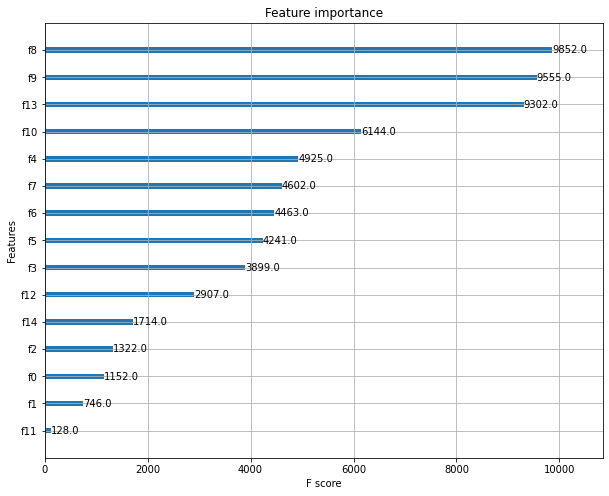

In [122]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
xgb.plot_importance(model, ax=ax)
plt.show()

# 여기서 (f+'숫자') 조합은, 원래 df의 column의 index와 동일하다.

In [133]:
importance = model.get_score(importance_type='gain')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
important_column_index = [int(f[1:]) for f, _ in importance]


In [138]:
for i,ind in enumerate(important_column_index) :
    print(i,'번째 중요 변수 : ',df.columns[ind])


0 번째 중요 변수 :  CryoSleep
1 번째 중요 변수 :  HomePlanet
2 번째 중요 변수 :  spend_fillna_0
3 번째 중요 변수 :  deck
4 번째 중요 변수 :  Spa
5 번째 중요 변수 :  FoodCourt
6 번째 중요 변수 :  side
7 번째 중요 변수 :  VRDeck
8 번째 중요 변수 :  ShoppingMall
9 번째 중요 변수 :  RoomService
10 번째 중요 변수 :  Destination
11 번째 중요 변수 :  num
12 번째 중요 변수 :  group
13 번째 중요 변수 :  last_name
14 번째 중요 변수 :  VIP_fill_na_False


# 왜 내가 제일 중요하다 생각했던 group이랑 VIP 가 중요도가 이렇게 낮지?

My Q) 

위는 XGboost 방식으로 계산한 변수 중요도야. 그런데 조금 궁금한게, VIP_fill_na_False 변수가 True일 경우, 사례는 적지만  target이 true인 경향이 60%로 매우 높았고, VIP_fill_na_False 변수가 False일 경우, 사례는 매우 많지만 target이 true인 경향이 49%로, VIP_fill_na 변수가 타겟변수와 유의미한 상관관계를 가질 것으로 예측했고, 실제 corr로 계산한 피어슨 상관계수도 타 변수에 비해 어느정도 높았는데 왜 예측에서 쓰이지 않은걸까? 네가 생각하는 이유를 설명해줘

<br>

Chat gpt A) 

VIP_fill_na_False 변수가 타겟 변수와 상관관계가 높다고 해서 반드시 모델에 반영되는 것은 아닙니다. 변수 중요도는 해당 변수가 모델 예측에 얼마나 중요한 역할을 하는지를 나타내는 지표일 뿐, 실제로 모델에서 사용되는 변수와 중요도가 높은 변수가 일치하지 않을 수도 있습니다.

또한, VIP_fill_na_False 변수가 True일 경우 target이 true인 경향이 높다고 하더라도, 이 변수 자체가 다른 변수와 중복되거나 정보의 양이 적어서 모델에서 더이상 유의미한 변수가 아닐 수도 있습니다. 따라서 변수 중요도만으로는 모델 예측 결과를 충분히 설명할 수 없습니다.

만약 VIP_fill_na_False 변수가 모델 예측에 미치는 영향을 확인하고 싶다면, 이 변수를 제외한 다른 변수들과 함께 모델을 학습하고 변수 중요도를 계산해보는 것이 좋습니다. 이를 통해 VIP_fill_na_False 변수의 유의미성을 다시한번 확인할 수 있습니다.
